In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [28]:
df = pd.read_csv(r"Telco-Customer-Churn.csv")

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.shape

(7043, 21)

In [31]:
# Display summary statistics for a dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values if necessary (for example, with 0)
df['TotalCharges'].fillna(0, inplace=True)

# Convert to int
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 17 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [39]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: customerID, Length: 7043, dtype: float64
---------------------------
Male      50.47565
Female    49.52435
Name: gender, dtype: float64
---------------------------
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
---------------------------
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
---------------------------
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
---------------------------
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
---------------------------
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
---------------------------


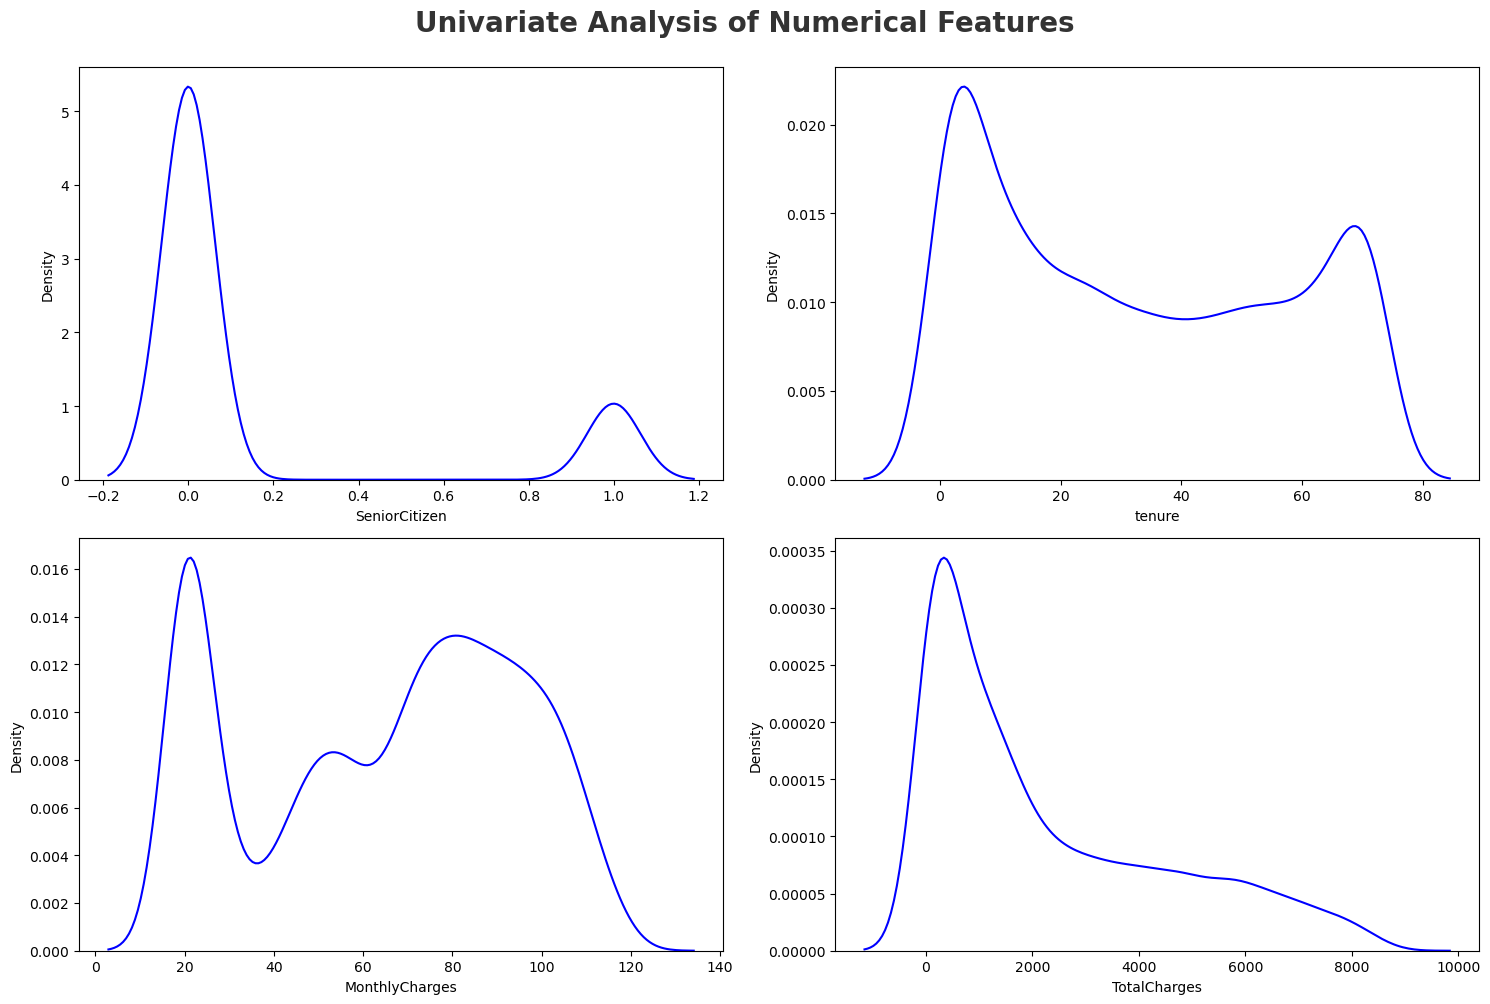

In [40]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

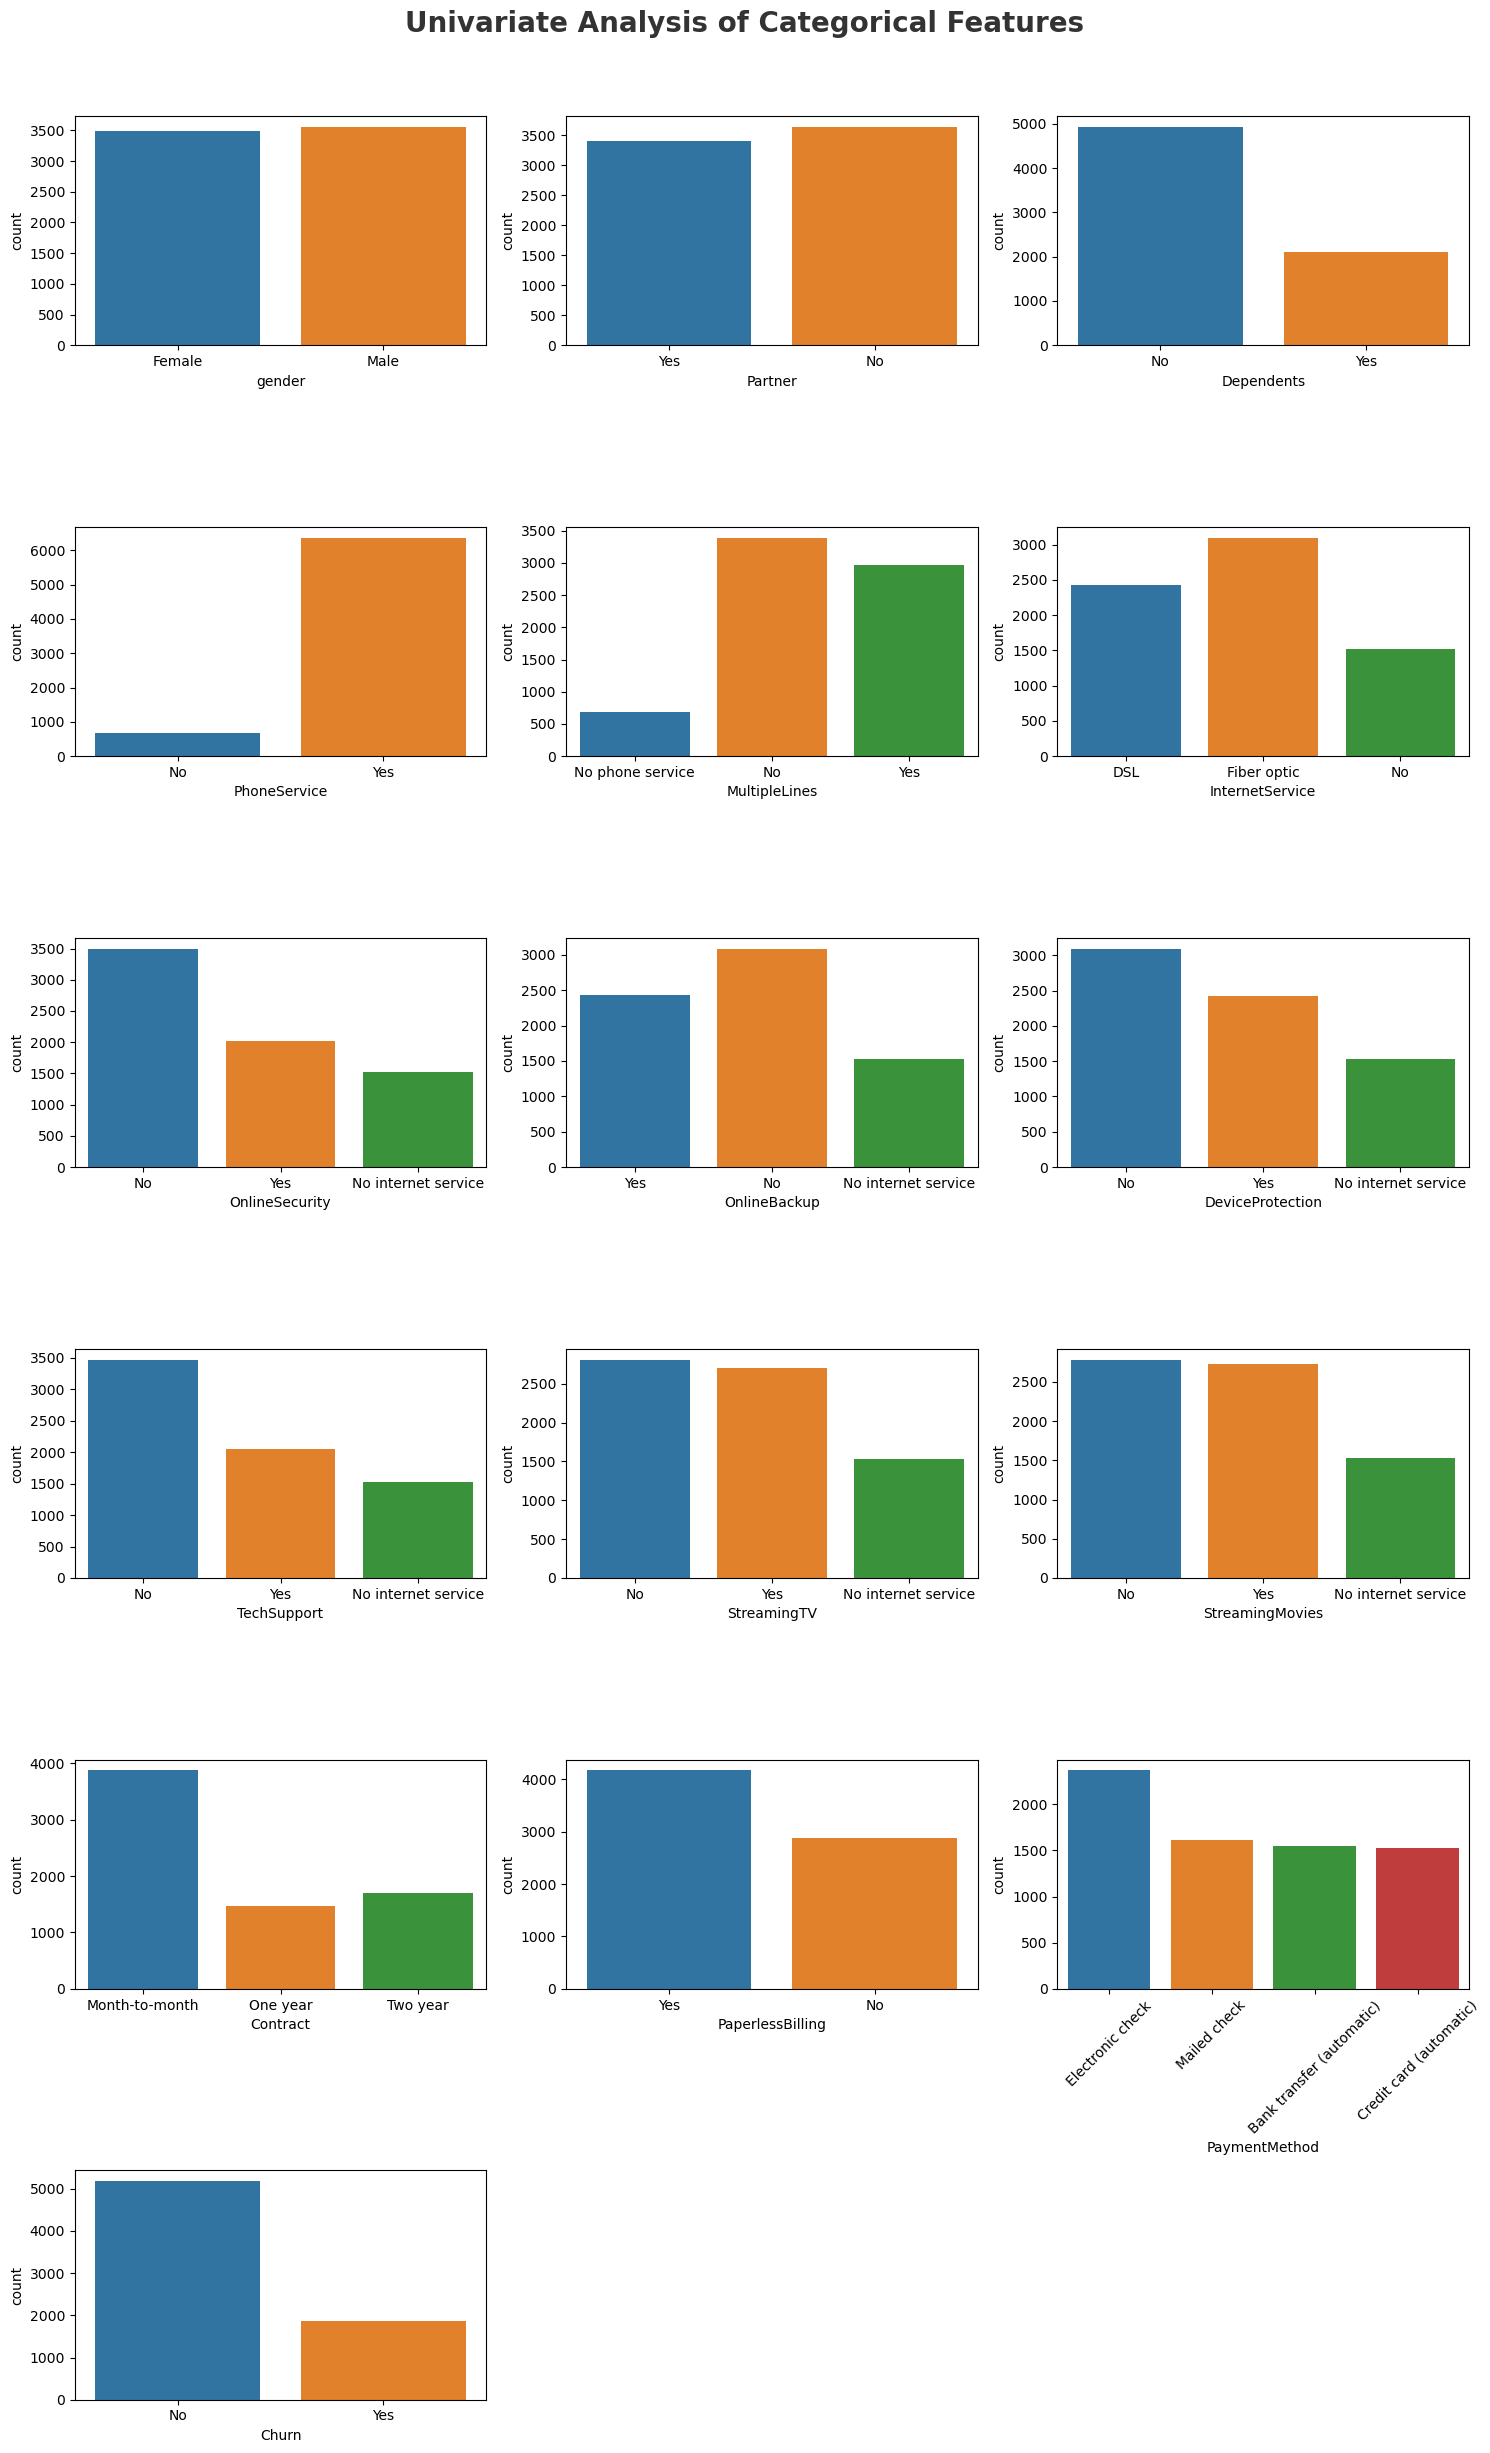

In [48]:
# Calculate the number of rows and columns based on the number of categorical features
#categorical_features.remove('customerID')
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

plt.figure(figsize=(15, num_rows * 4))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    if categorical_features[i] == 'PaymentMethod':
        plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [55]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['SeniorCitizen']

We have 3 continuous_features : ['tenure', 'MonthlyCharges', 'TotalCharges']


* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [51]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


**Report** 
* Here `gender`,`PhoneService` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

discrete_features=[feature for feature in numeric_features if len(df[feature].unique()) < 10]
print('Num of discrete features :',discrete_features)

Num of continues features : ['tenure', 'MonthlyCharges', 'TotalCharges']
Num of discrete features : ['SeniorCitizen']


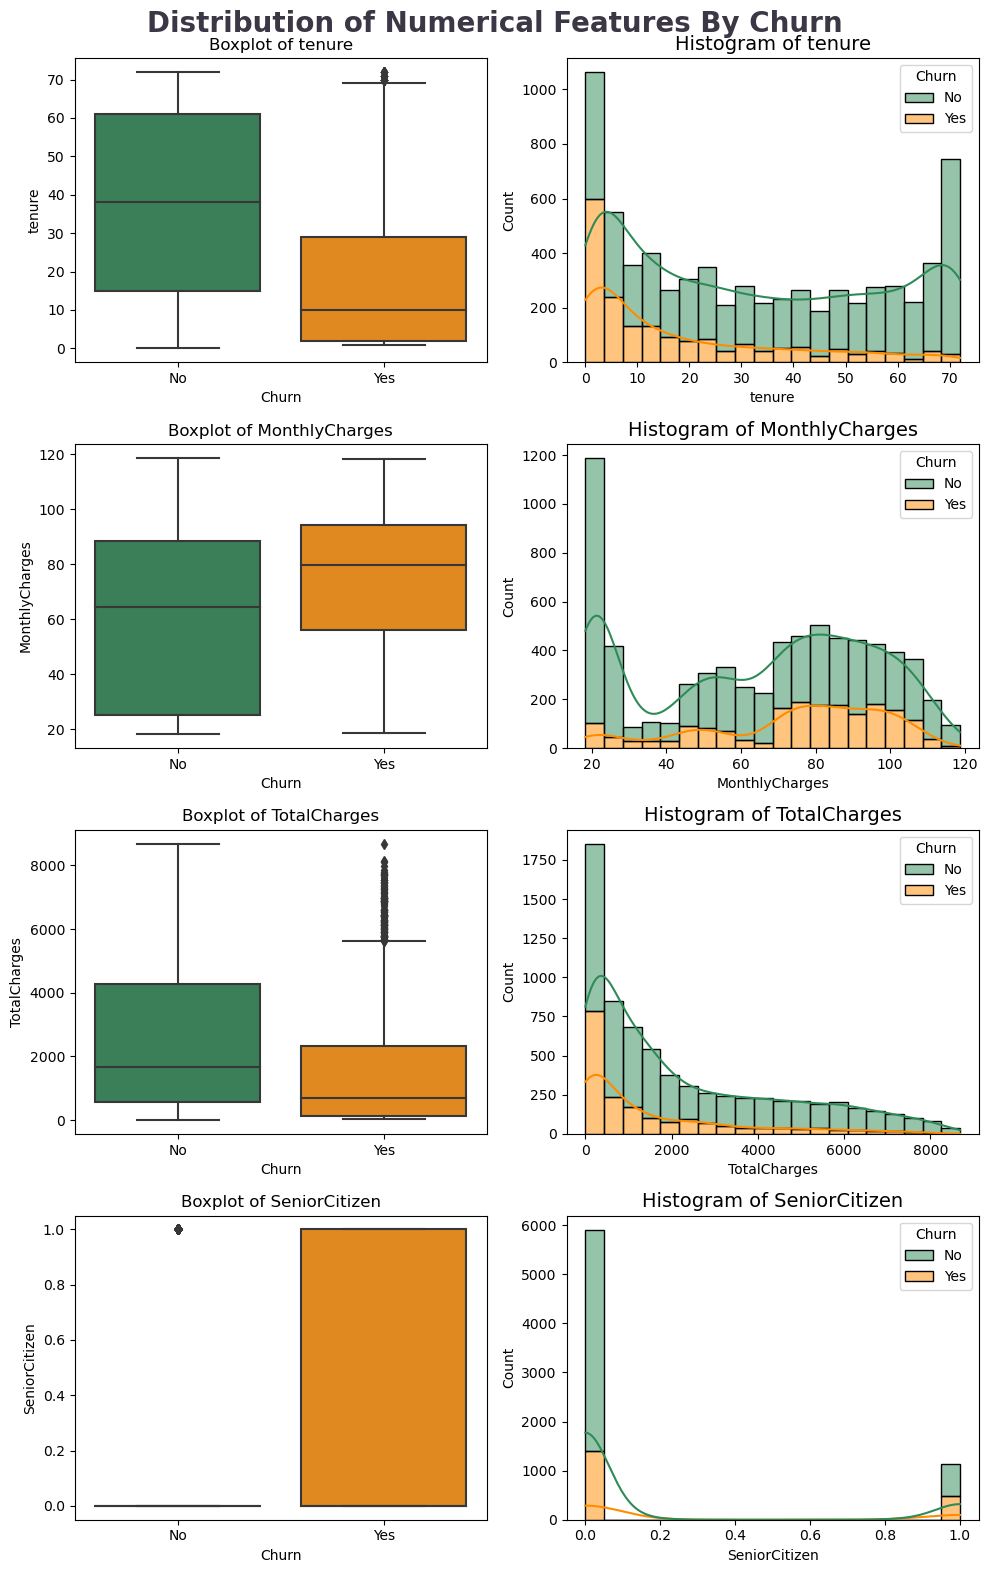

In [69]:
clr1 = ['#2E8B57', '#FF8C00']

# Combine continuous and discrete features
all_numeric_features = continues_features + discrete_features

fig, ax = plt.subplots(len(all_numeric_features), 2, figsize=(10, len(all_numeric_features) * 4))
fig.suptitle('Distribution of Numerical Features By Churn', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(all_numeric_features):   
    sns.boxplot(data=df, x='Churn', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

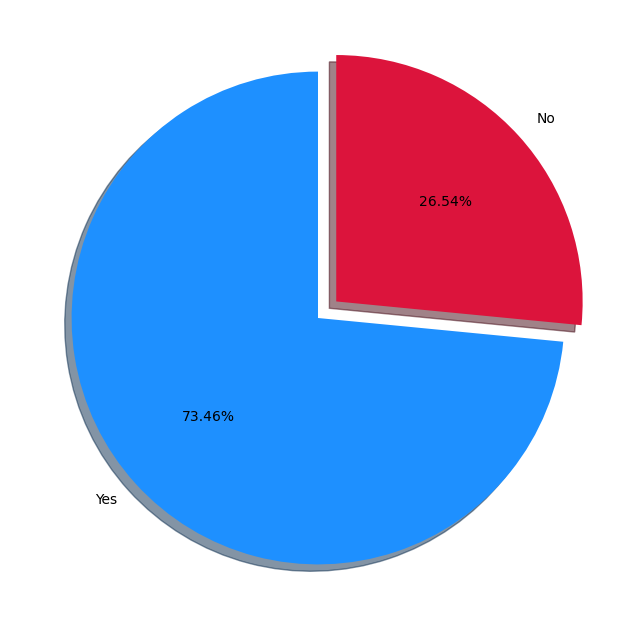

In [71]:
percentage = df.Churn.value_counts(normalize=True)*100
labels = ["Yes","No"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1E90FF', '#DC143C']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [128]:
# Group data by gender and churn status, calculate percentages
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).to_frame() * 100

In [129]:
gender_churn

Churn
gender Churn           
Female No     73.079128
       Yes    26.920872
Male   No     73.839662
       Yes    26.160338

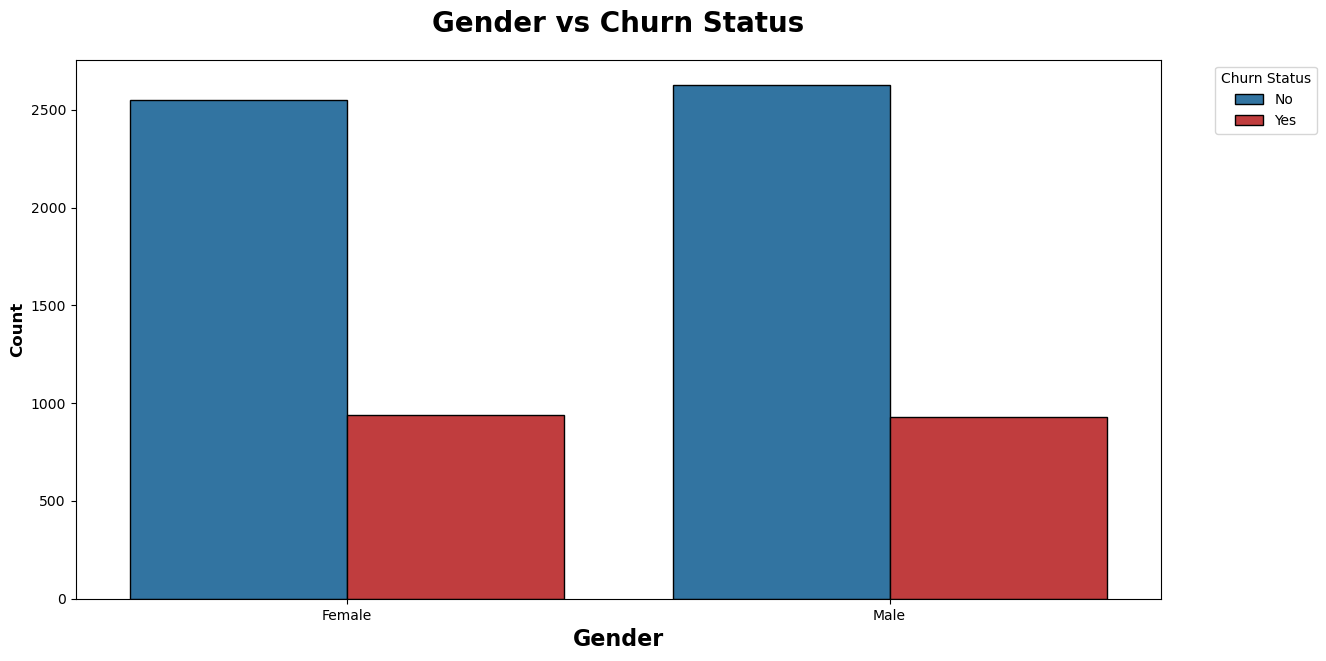

In [132]:
# Define the new color palette
new_palette = ['#1f77b4', '#d62728']  # Blue and Red

# Plot the count of gender by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="gender", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Gender vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

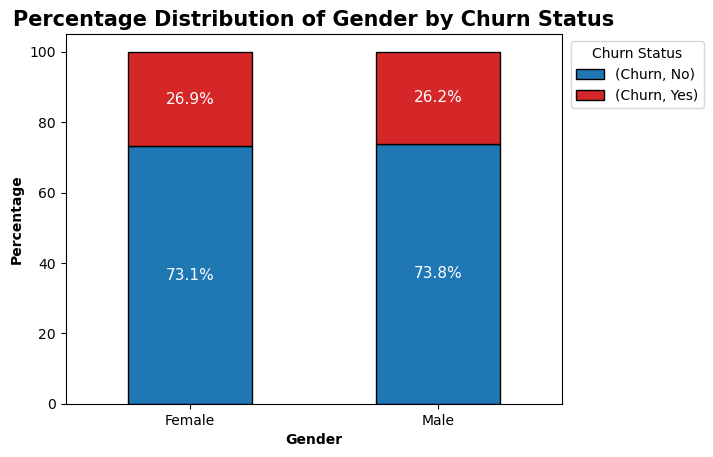

In [134]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = gender_churn.unstack().plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'], edgecolor='black')
plt.title("Percentage Distribution of Gender by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [141]:
# Group data by partner and churn status, calculate percentages
partner_churn = df.groupby('Partner')['Churn'].value_counts(normalize=True).to_frame() * 100
partner_churn

Churn
Partner Churn           
No      No     67.042021
        Yes    32.957979
Yes     No     80.335097
        Yes    19.664903

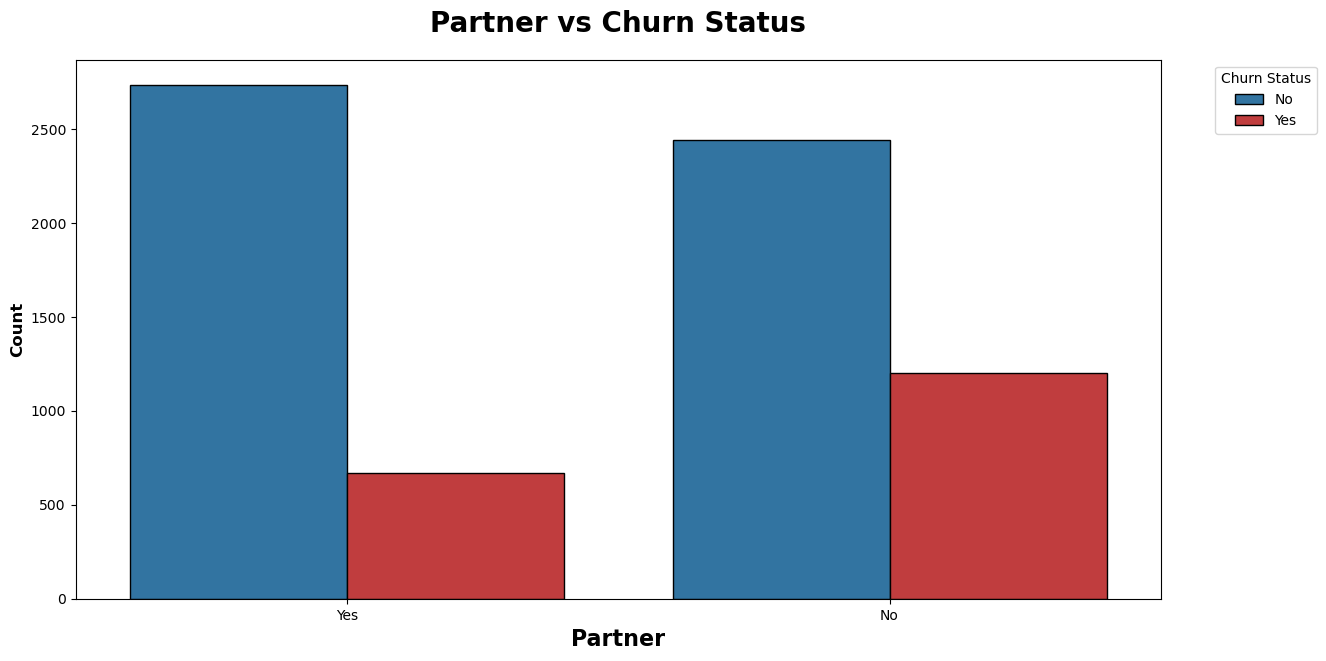

In [147]:
# Plot the count of partner by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="Partner", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Partner vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Partner", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

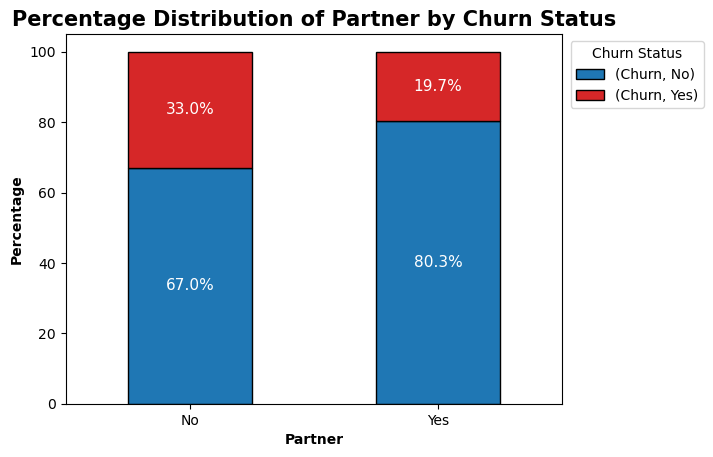

In [148]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = partner_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Partner by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [149]:
# Group data by dependents and churn status, calculate percentages
dependents_churn = df.groupby('Dependents')['Churn'].value_counts(normalize=True).to_frame() * 100
dependents_churn


Churn
Dependents Churn           
No         No     68.720860
           Yes    31.279140
Yes        No     84.549763
           Yes    15.450237

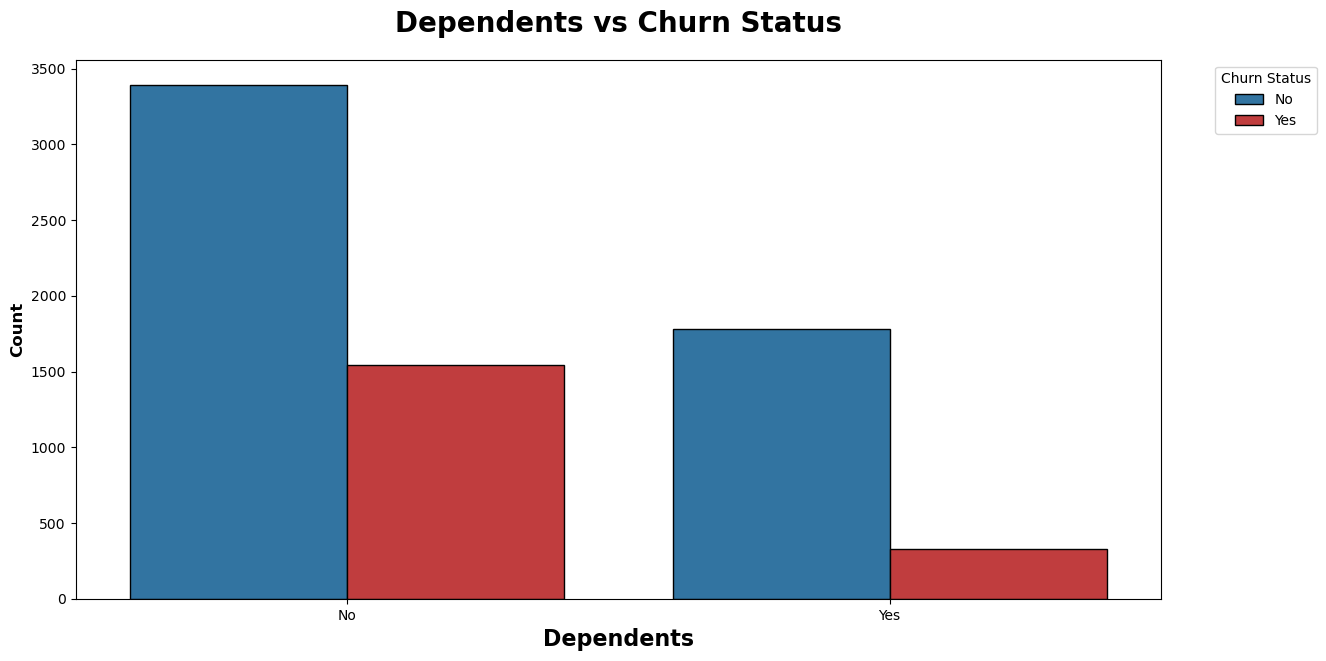

In [150]:
# Plot the count of dependents by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="Dependents", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Dependents vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Dependents", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


<Figure size 1400x700 with 0 Axes>

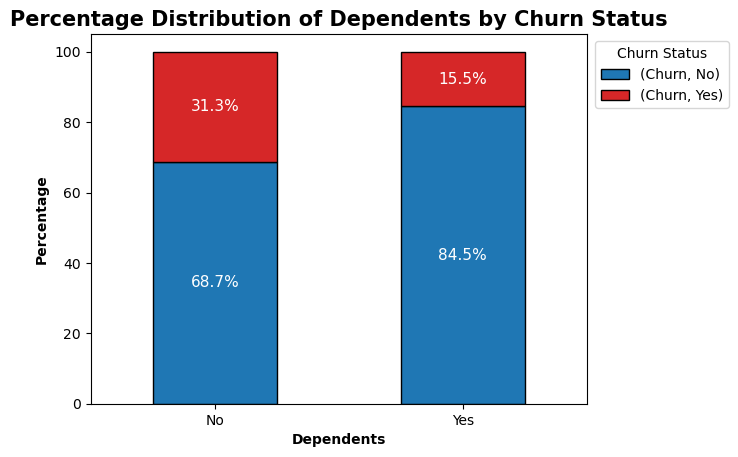

In [151]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = dependents_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Dependents by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Dependents', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [153]:
# Group data by phone service and churn status, calculate percentages
phone_service_churn = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).to_frame() * 100
phone_service_churn

Churn
PhoneService Churn           
No           No     75.073314
             Yes    24.926686
Yes          No     73.290363
             Yes    26.709637

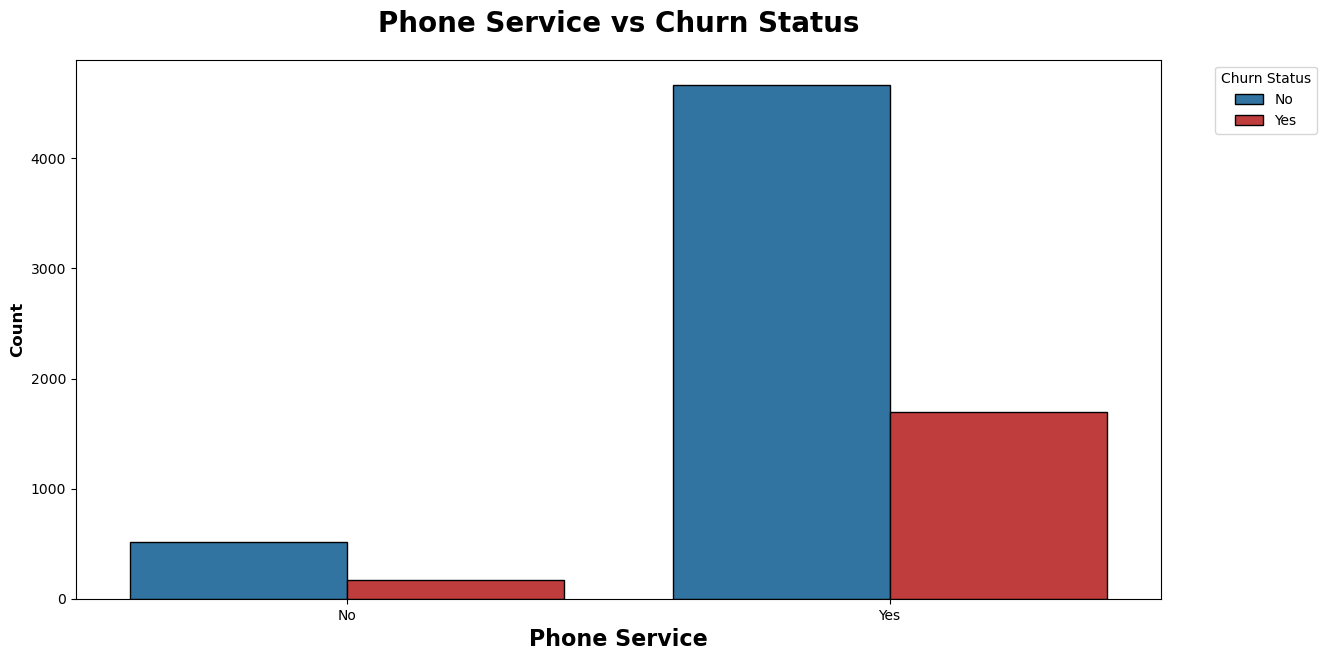

In [154]:
# Plot the count of phone service by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="PhoneService", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Phone Service vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Phone Service", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

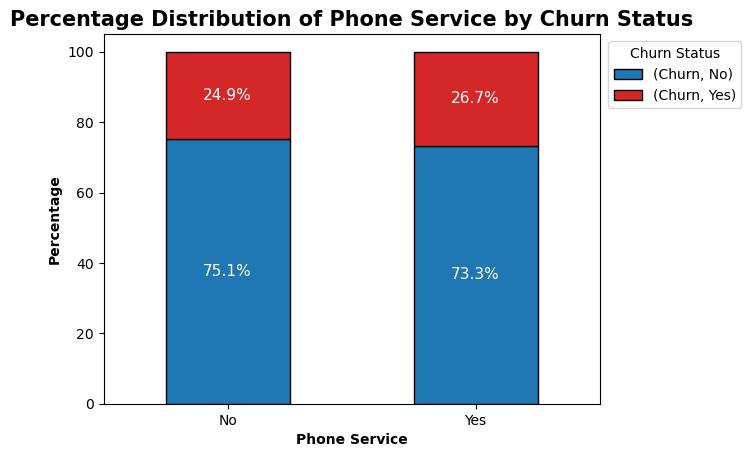

In [155]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = phone_service_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Phone Service by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Phone Service', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [156]:
# Group data by multiple lines and churn status, calculate percentages
multiple_lines_churn = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).to_frame() * 100
multiple_lines_churn

Churn
MultipleLines    Churn           
No               No     74.955752
                 Yes    25.044248
No phone service No     75.073314
                 Yes    24.926686
Yes              No     71.390104
                 Yes    28.609896

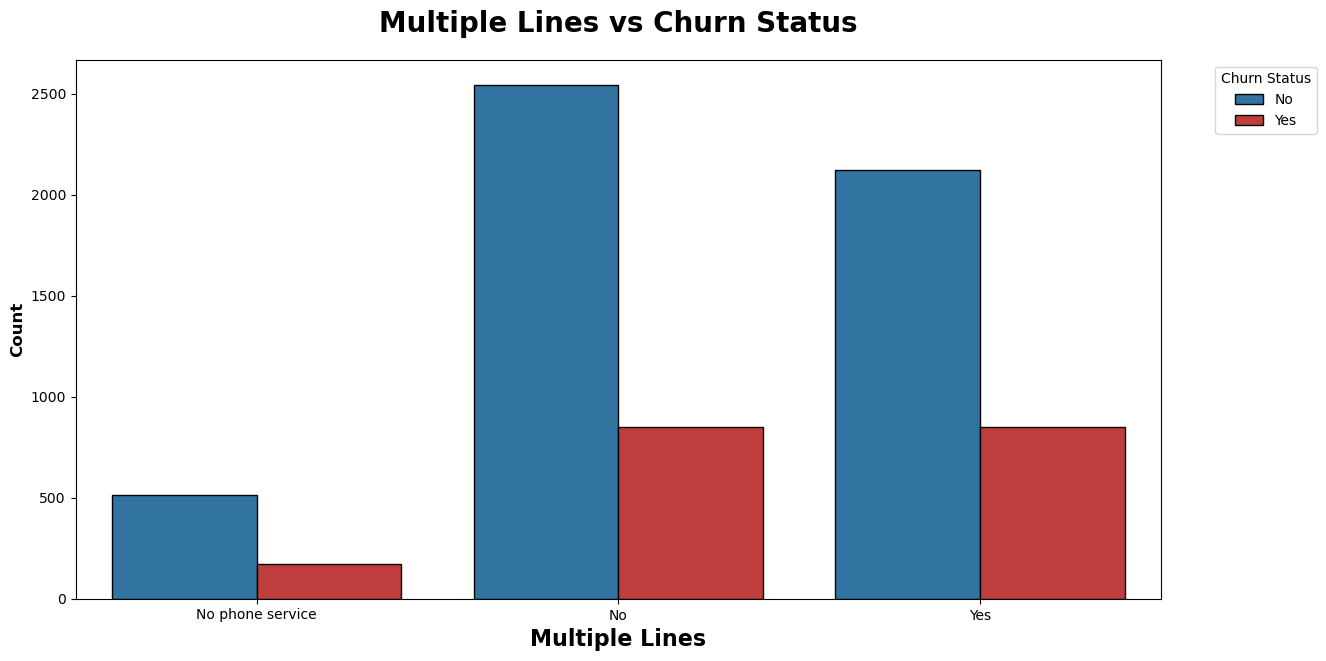

In [157]:
# Plot the count of multiple lines by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="MultipleLines", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Multiple Lines vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Multiple Lines", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

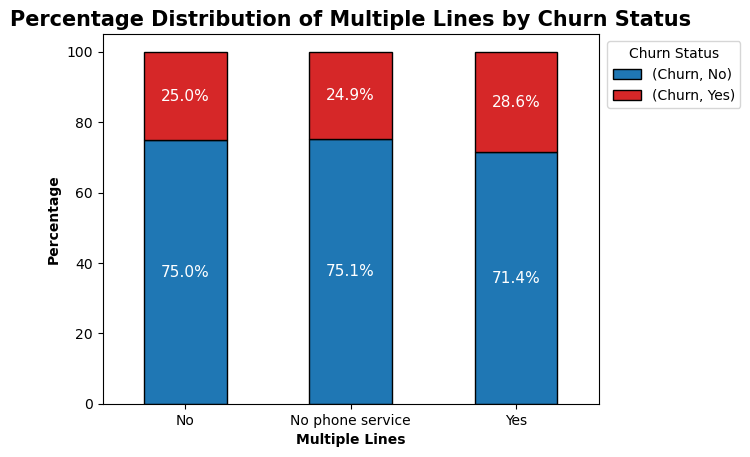

In [158]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = multiple_lines_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Multiple Lines by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Multiple Lines', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [159]:
# Group data by internet service and churn status, calculate percentages
internet_service_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).to_frame() * 100
internet_service_churn

Churn
InternetService Churn           
DSL             No     81.040892
                Yes    18.959108
Fiber optic     No     58.107235
                Yes    41.892765
No              No     92.595020
                Yes     7.404980

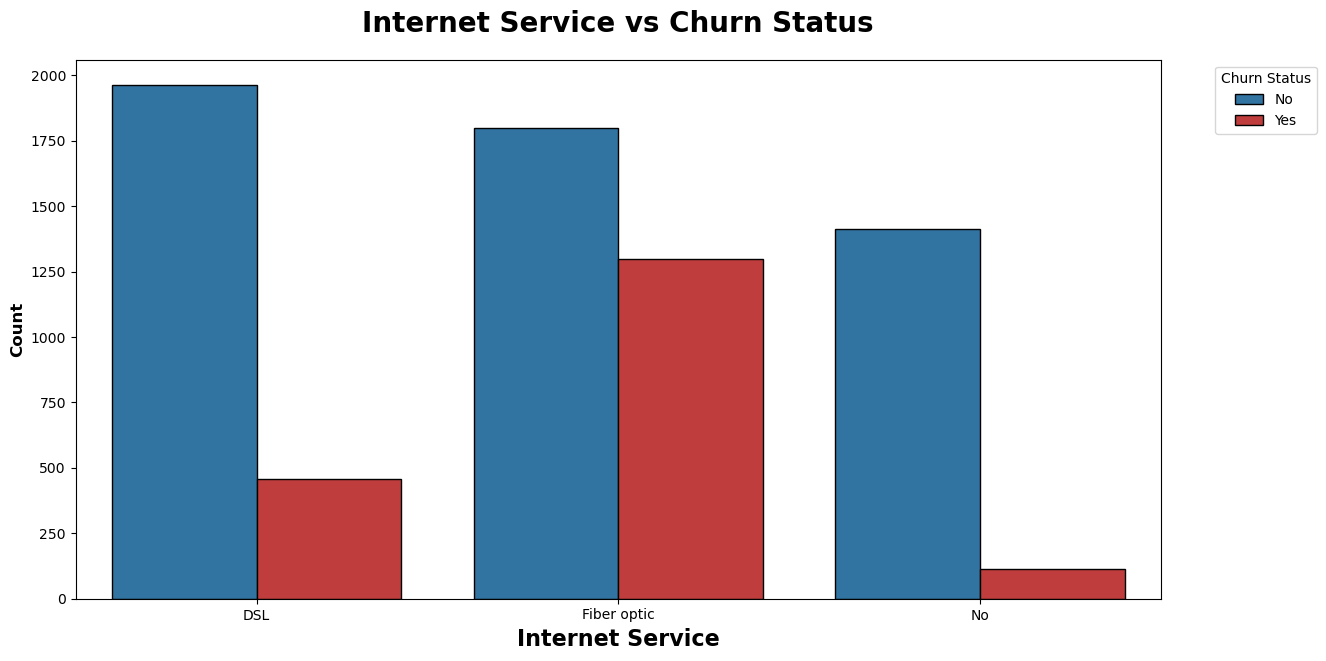

In [160]:
# Plot the count of internet service by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="InternetService", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Internet Service vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Internet Service", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

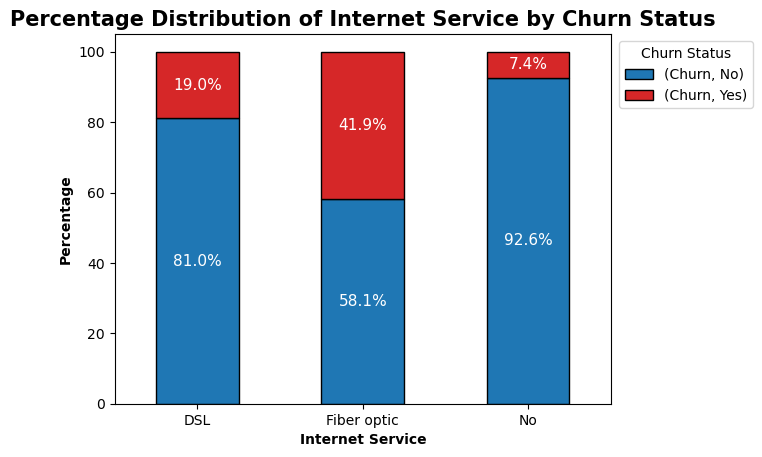

In [161]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = internet_service_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Internet Service by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Internet Service', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [162]:
# Group data by online security and churn status, calculate percentages
online_security_churn = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).to_frame() * 100
online_security_churn

Churn
OnlineSecurity      Churn           
No                  No     58.233276
                    Yes    41.766724
No internet service No     92.595020
                    Yes     7.404980
Yes                 No     85.388806
                    Yes    14.611194

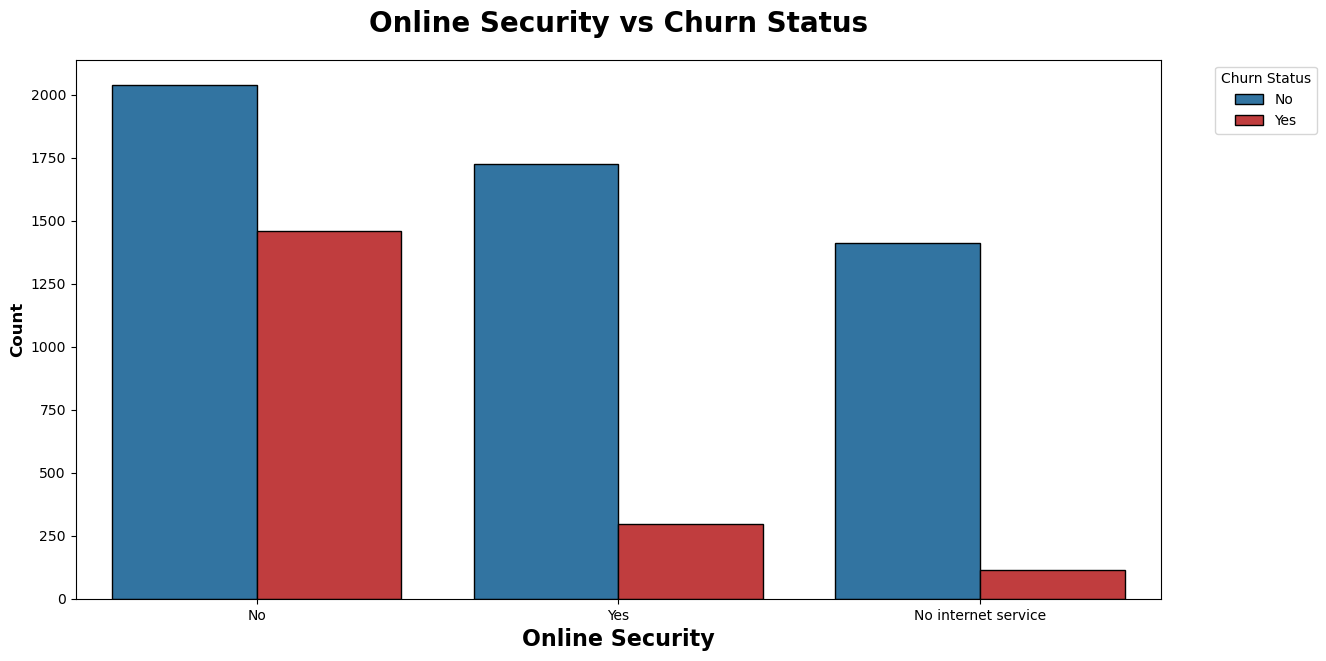

In [163]:
# Plot the count of online security by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Online Security vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Online Security", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

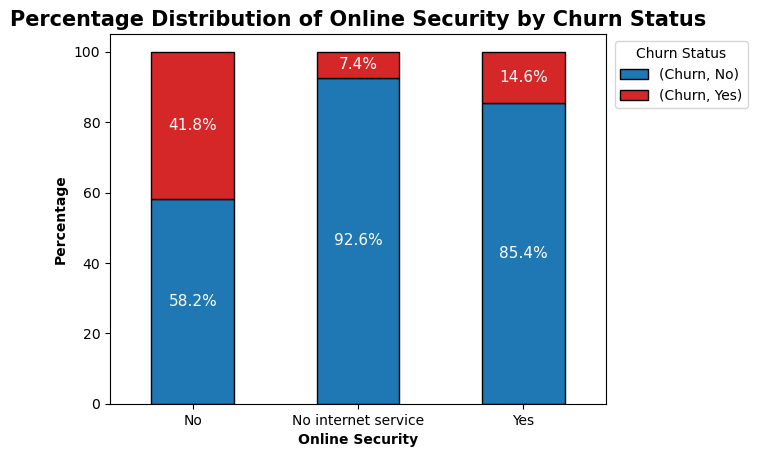

In [164]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = online_security_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Online Security by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Online Security', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [165]:
# Group data by online backup and churn status, calculate percentages
online_backup_churn = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).to_frame() * 100
online_backup_churn

Churn
OnlineBackup        Churn           
No                  No     60.071244
                    Yes    39.928756
No internet service No     92.595020
                    Yes     7.404980
Yes                 No     78.468506
                    Yes    21.531494

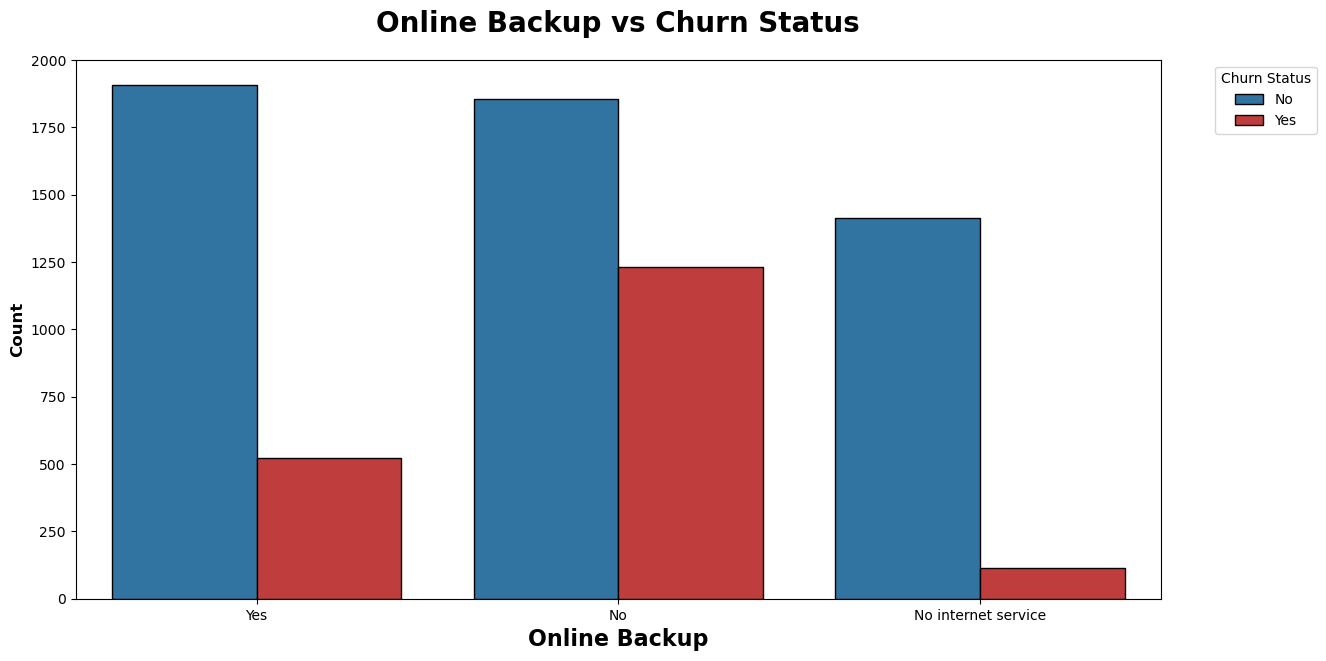

In [166]:
# Plot the count of online backup by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="OnlineBackup", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Online Backup vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Online Backup", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

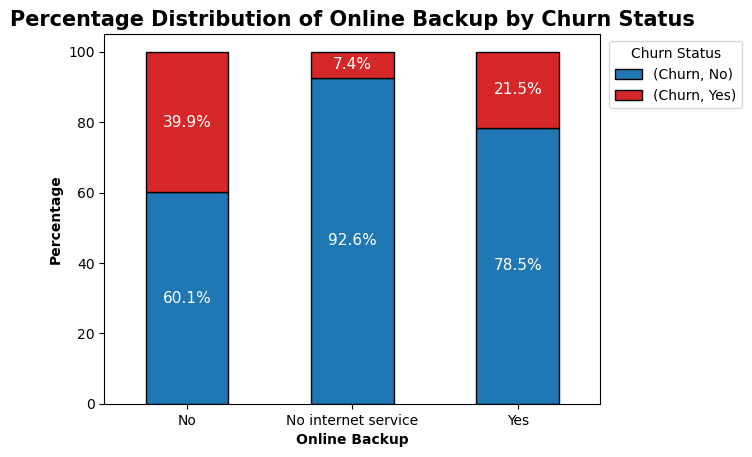

In [167]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = online_backup_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Online Backup by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Online Backup', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

                               Churn
DeviceProtection    Churn           
No                  No     60.872375
                    Yes    39.127625
No internet service No     92.595020
                    Yes     7.404980
Yes                 No     77.497936
                    Yes    22.502064


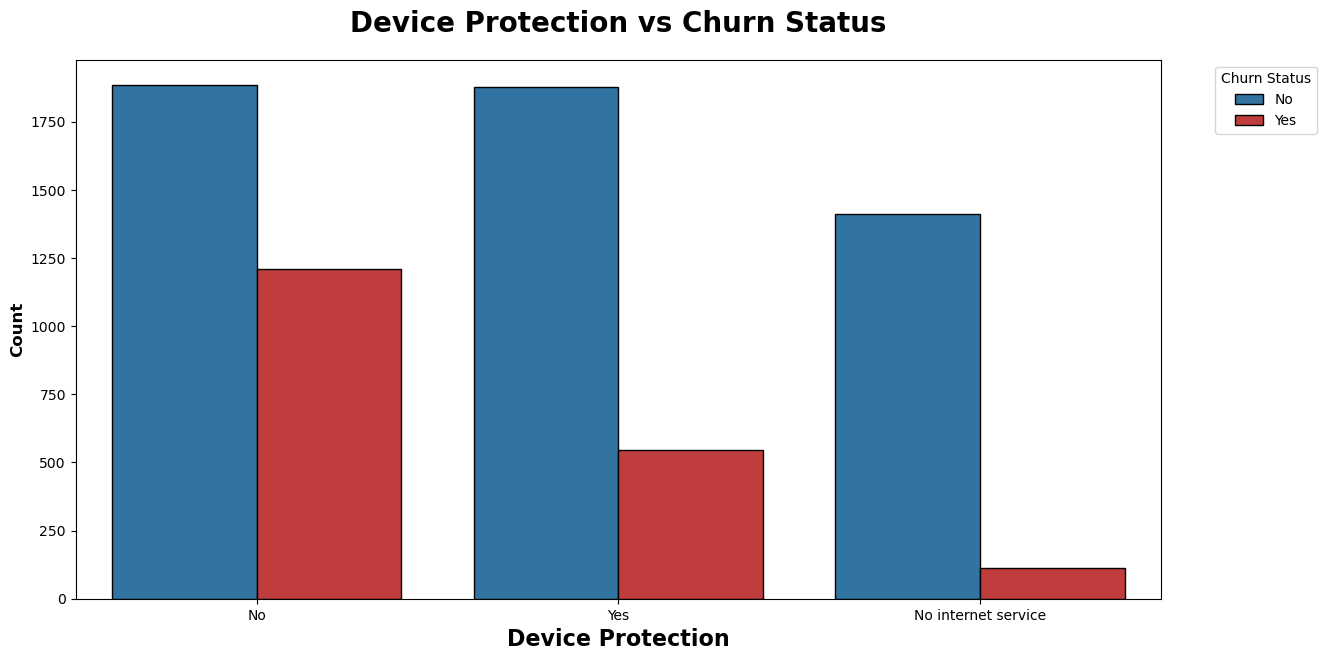

<Figure size 1400x700 with 0 Axes>

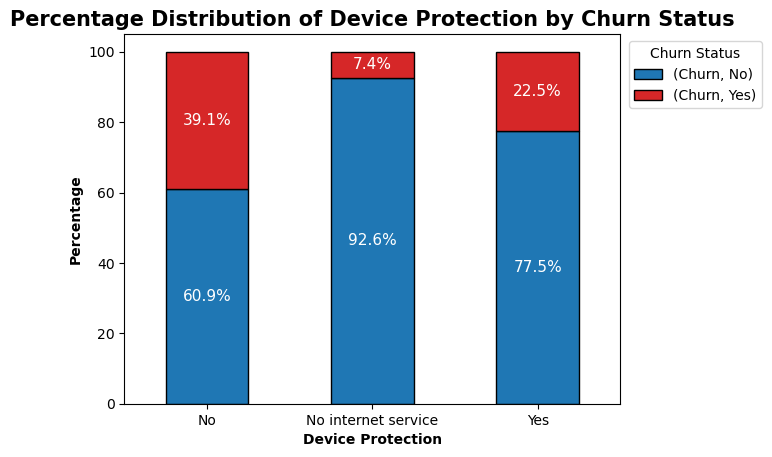

In [170]:
# Group data by device protection and churn status, calculate percentages
device_protection_churn = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).to_frame() * 100
print(device_protection_churn)

# Plot the count of device protection by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="DeviceProtection", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Device Protection vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Device Protection", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = device_protection_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Device Protection by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Device Protection', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


                               Churn
TechSupport         Churn           
No                  No     58.364526
                    Yes    41.635474
No internet service No     92.595020
                    Yes     7.404980
Yes                 No     84.833659
                    Yes    15.166341


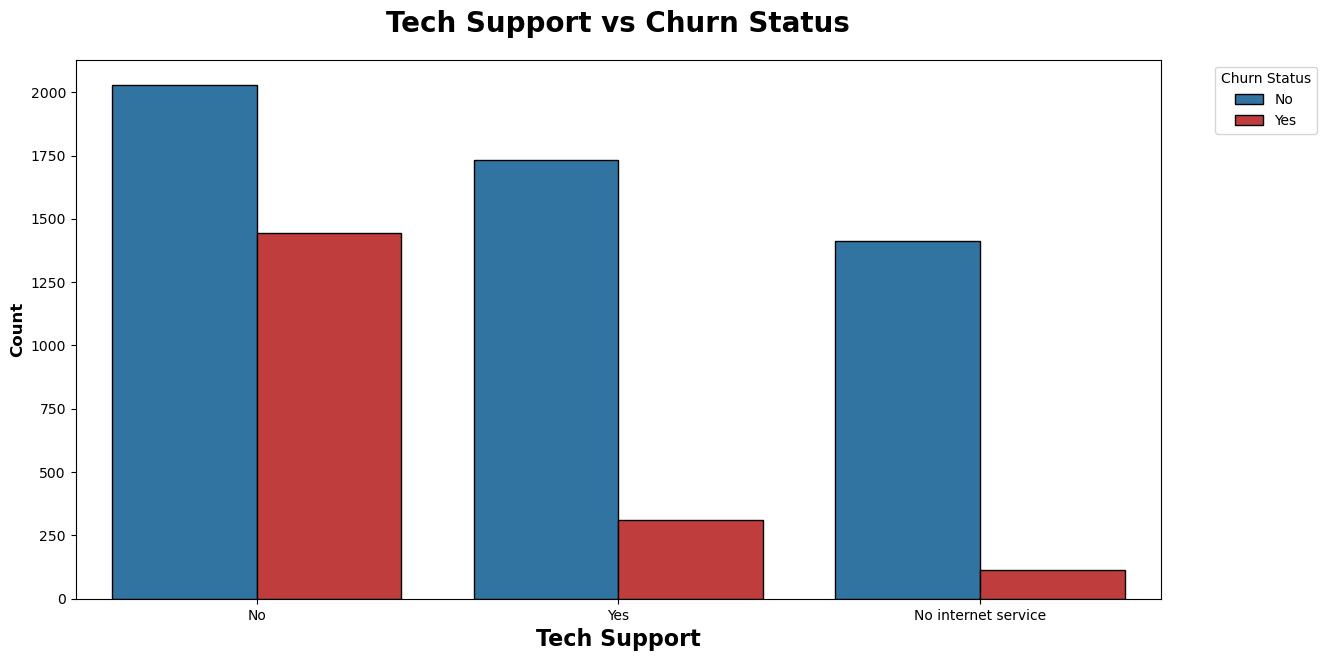

<Figure size 1400x700 with 0 Axes>

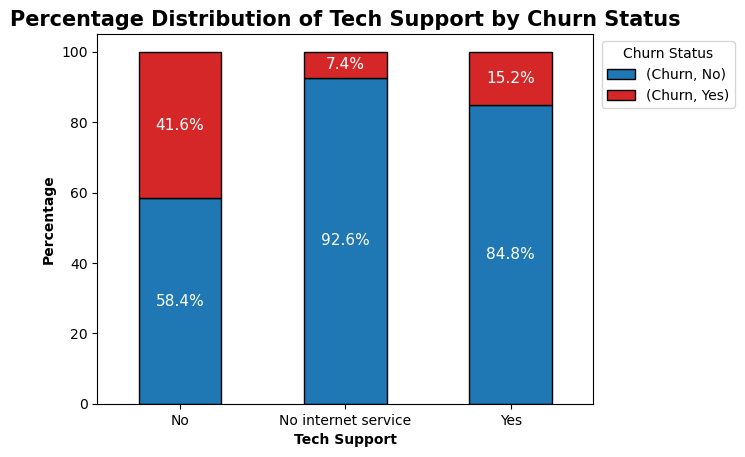

In [169]:
# Group data by tech support and churn status, calculate percentages
tech_support_churn = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).to_frame() * 100
print(tech_support_churn)

# Plot the count of tech support by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="TechSupport", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Tech Support vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Tech Support", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = tech_support_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Tech Support by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Tech Support', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


                               Churn
StreamingTV         Churn           
No                  No     66.476868
                    Yes    33.523132
No internet service No     92.595020
                    Yes     7.404980
Yes                 No     69.929812
                    Yes    30.070188


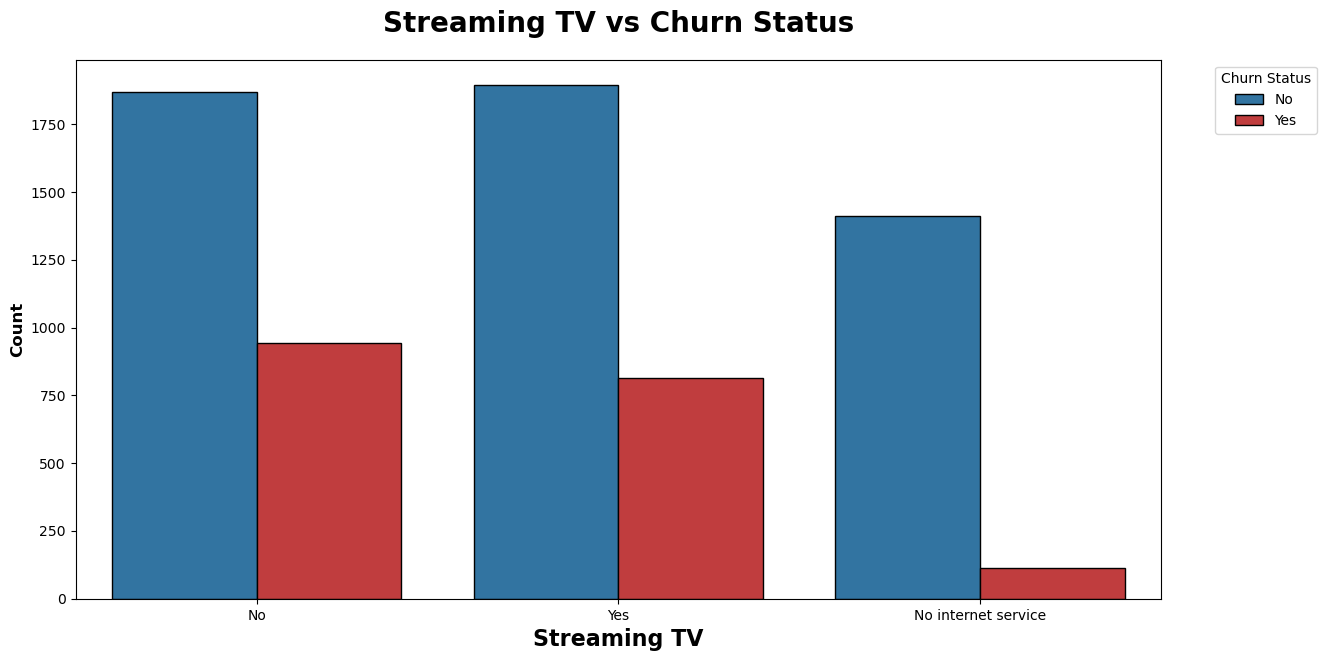

<Figure size 1400x700 with 0 Axes>

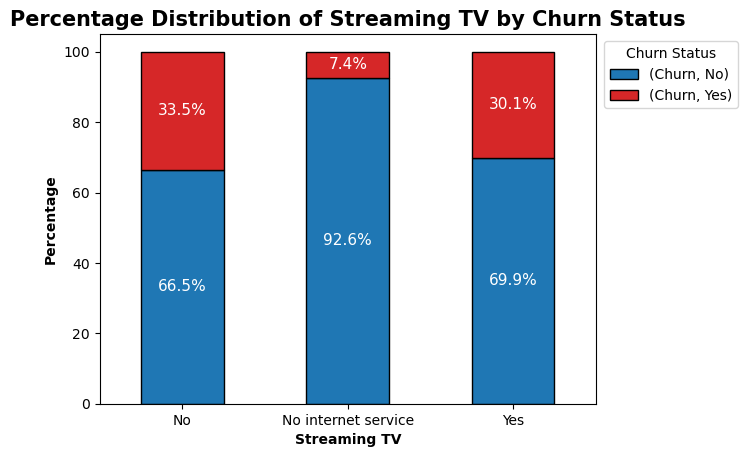

In [171]:
# Group data by streaming TV and churn status, calculate percentages
streaming_tv_churn = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).to_frame() * 100
print(streaming_tv_churn)

# Plot the count of streaming TV by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="StreamingTV", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Streaming TV vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Streaming TV", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = streaming_tv_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Streaming TV by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Streaming TV', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


                               Churn
StreamingMovies     Churn           
No                  No     66.319569
                    Yes    33.680431
No internet service No     92.595020
                    Yes     7.404980
Yes                 No     70.058565
                    Yes    29.941435


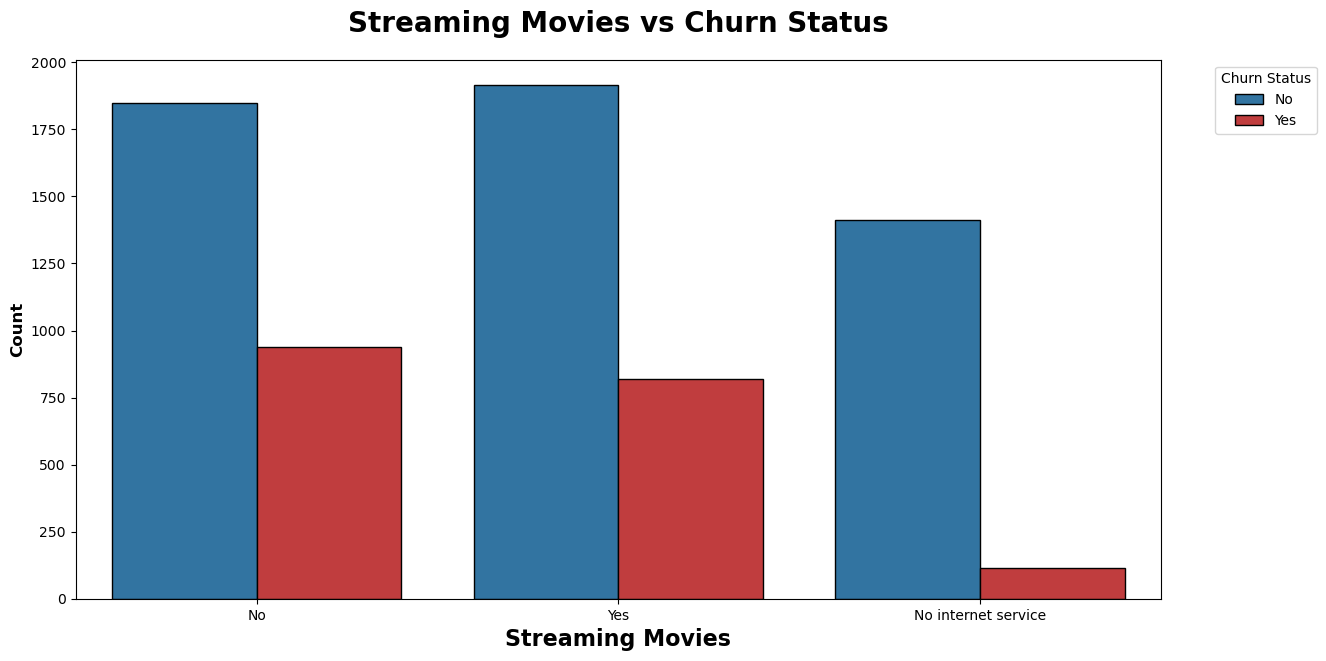

<Figure size 1400x700 with 0 Axes>

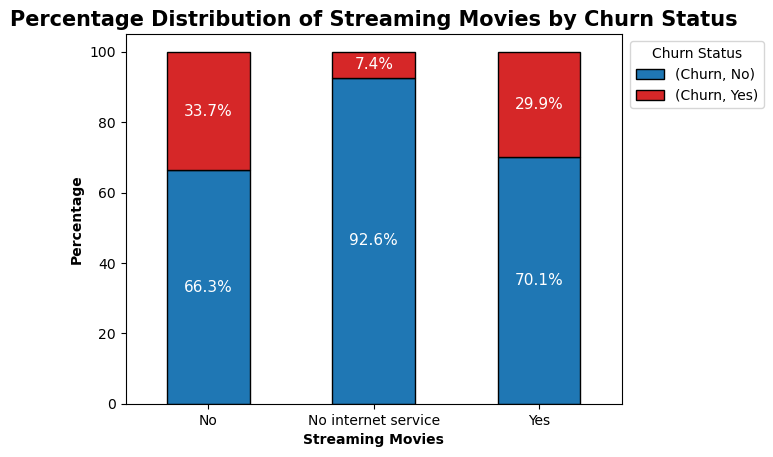

In [174]:
# Group data by streaming movies and churn status, calculate percentages
streaming_movies_churn = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).to_frame() * 100
print(streaming_movies_churn)

# Plot the count of streaming movies by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="StreamingMovies", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Streaming Movies vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Streaming Movies", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = streaming_movies_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Streaming Movies by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Streaming Movies', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


                          Churn
Contract       Churn           
Month-to-month No     57.290323
               Yes    42.709677
One year       No     88.730482
               Yes    11.269518
Two year       No     97.168142
               Yes     2.831858


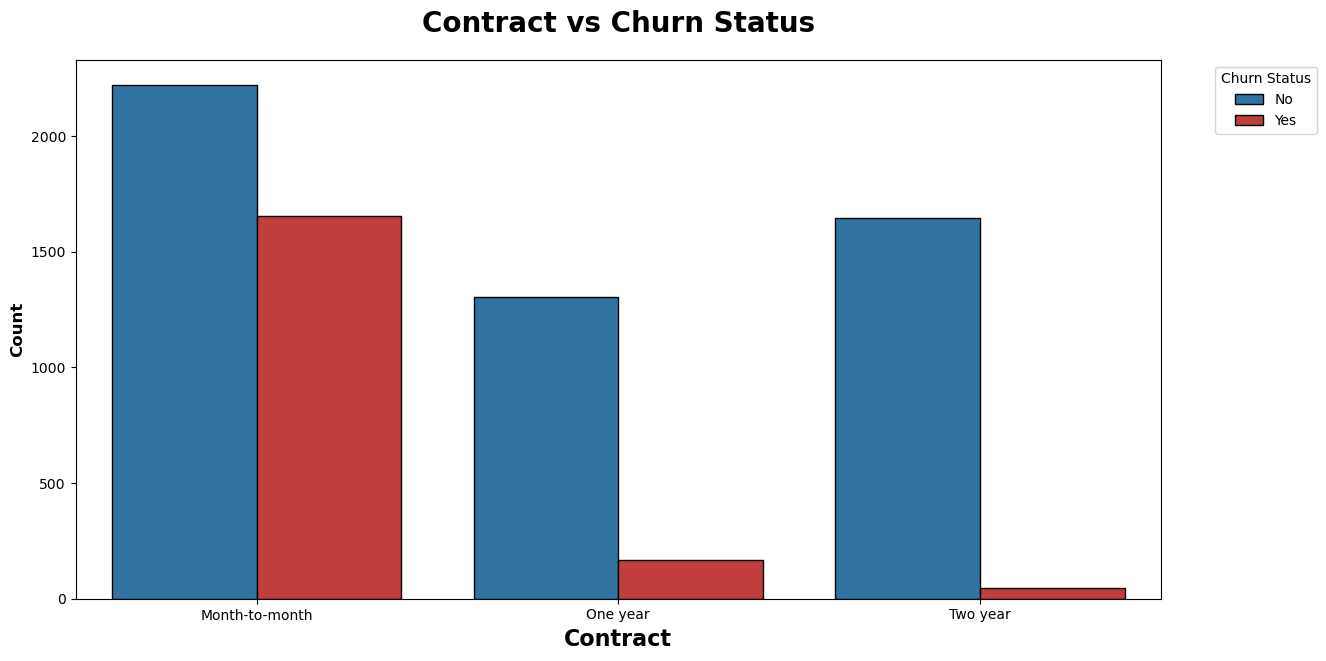

<Figure size 1400x700 with 0 Axes>

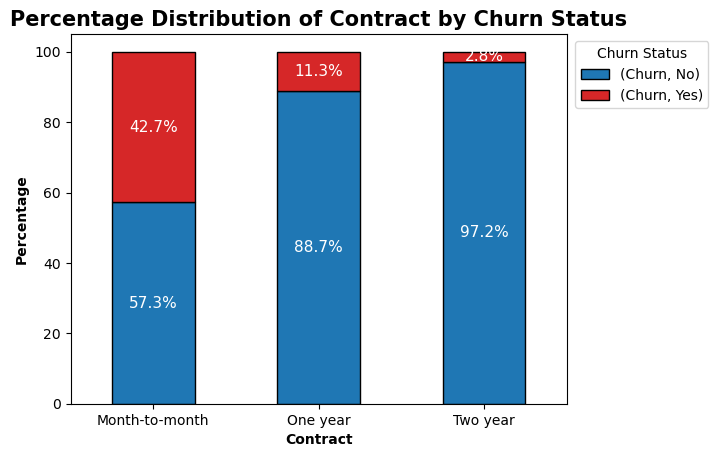

In [181]:
# Group data by contract and churn status, calculate percentages
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).to_frame() * 100
print(contract_churn)

# Plot the count of contract by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="Contract", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Contract vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Contract", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = contract_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Contract by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Contract', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


                            Churn
PaperlessBilling Churn           
No               No     83.669916
                 Yes    16.330084
Yes              No     66.434908
                 Yes    33.565092


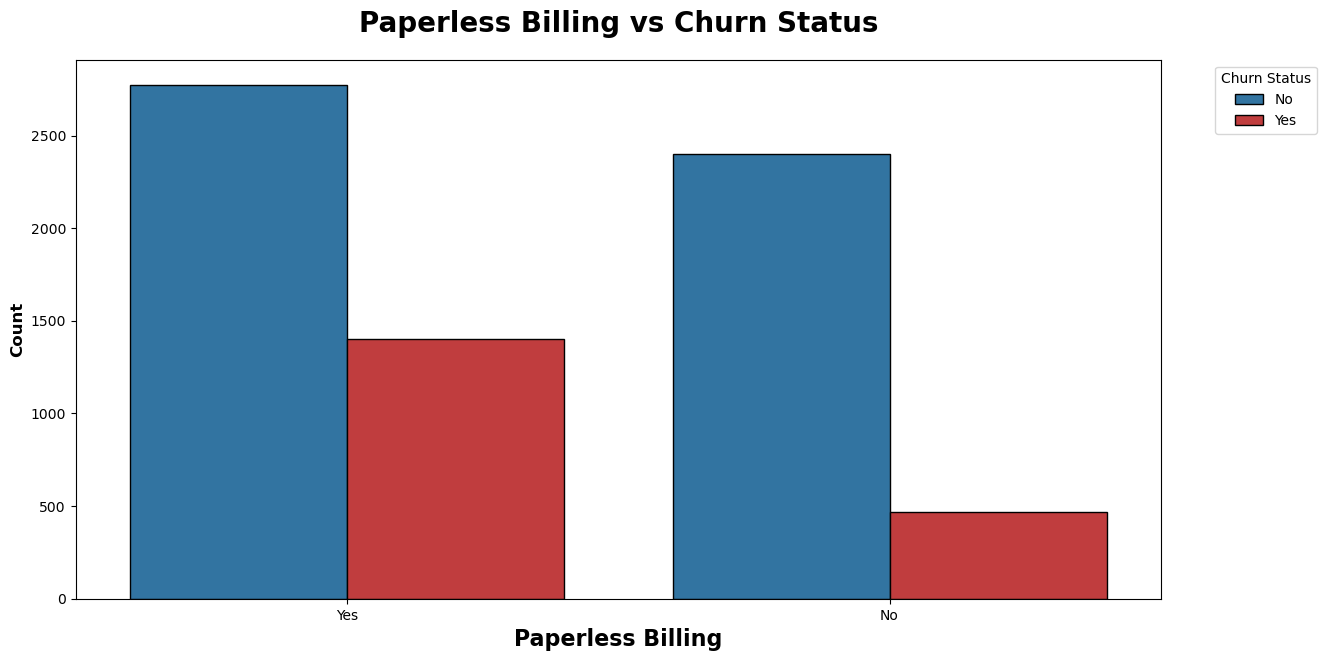

<Figure size 1400x700 with 0 Axes>

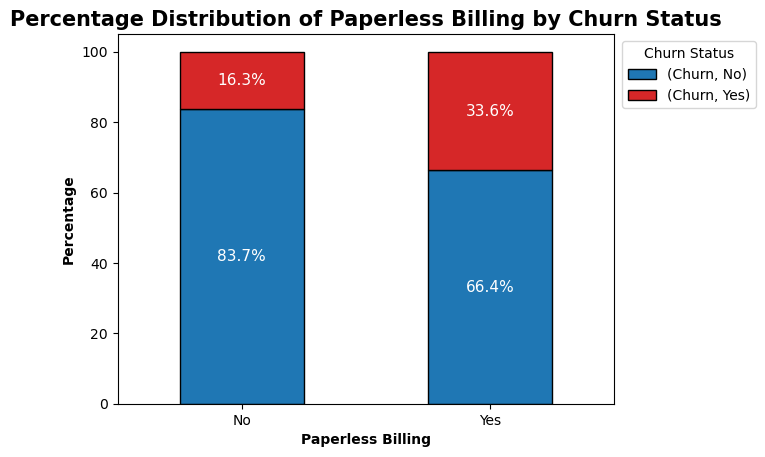

In [183]:
# Group data by paperless billing and churn status, calculate percentages
paperless_billing_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).to_frame() * 100
print(paperless_billing_churn)

# Plot the count of paperless billing by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Paperless Billing vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Paperless Billing", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = paperless_billing_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Paperless Billing by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Paperless Billing', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


                                     Churn
PaymentMethod             Churn           
Bank transfer (automatic) No     83.290155
                          Yes    16.709845
Credit card (automatic)   No     84.756899
                          Yes    15.243101
Electronic check          No     54.714588
                          Yes    45.285412
Mailed check              No     80.893300
                          Yes    19.106700


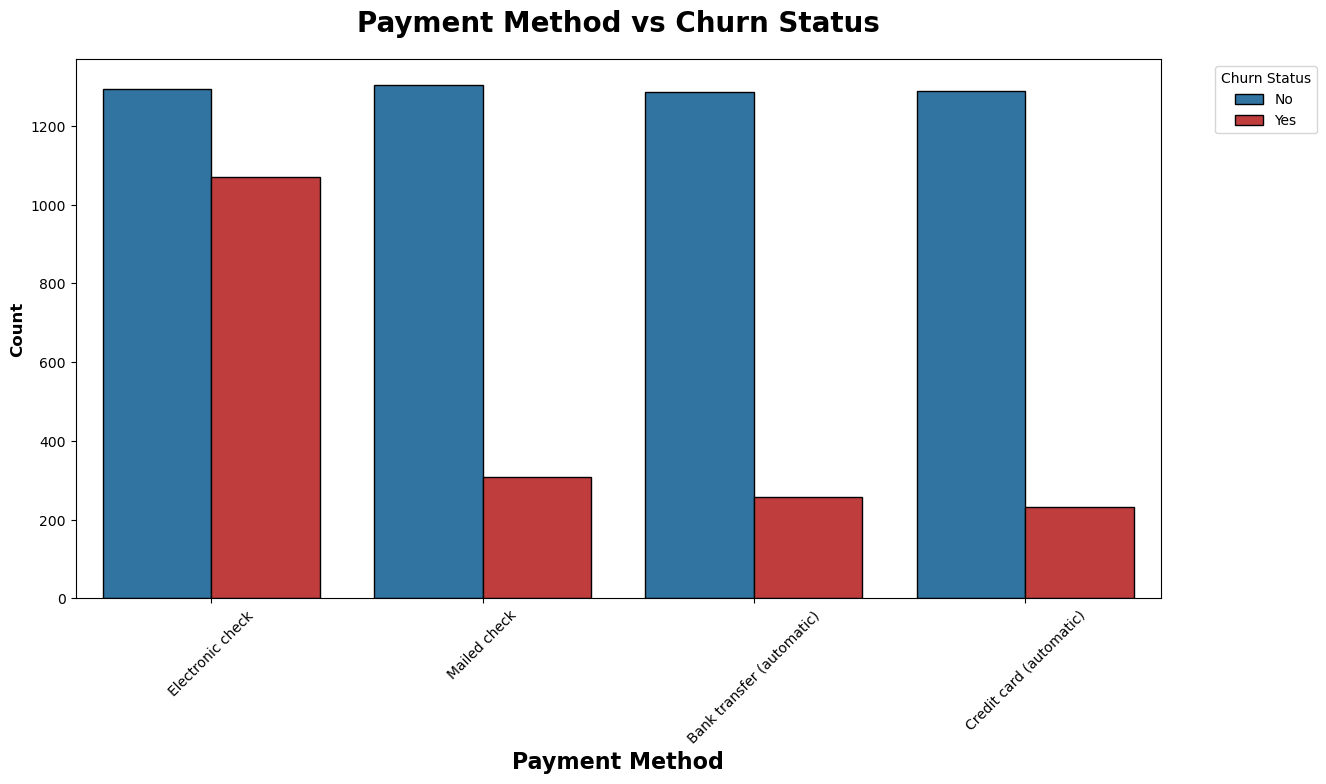

<Figure size 1400x700 with 0 Axes>

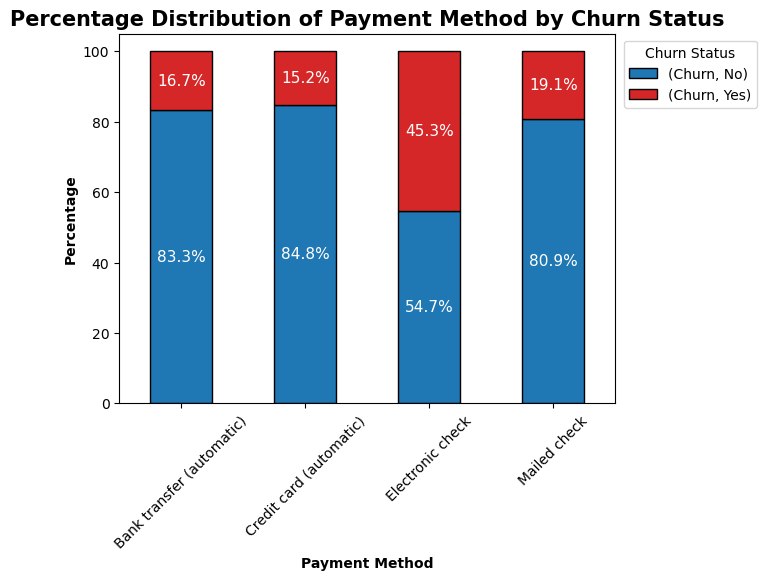

In [184]:
# Group data by payment method and churn status, calculate percentages
payment_method_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).to_frame() * 100
print(payment_method_churn)

# Plot the count of payment method by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Payment Method vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Payment Method", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = payment_method_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Payment Method by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Payment Method', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()
